# Missing Data Assignment

## Step 1: Baseline
Using Sklearn get the Boston Housing dataset.
Fit a linear regressor to the data as a baeline.  There is no need to do Cross-Validation.  We are exploring the change in results

What is the loss and what are the goodness of fit parameters?  This will be our baseline for comparison.


In [9]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
from sklearn.datasets import load_boston

boston = load_boston()
# boston
print('Keys: ', boston.keys())
print('Data Shape: ',boston.data.shape)
print('Features: ', boston.feature_names)
print(boston.DESCR)

df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['PRICE'] = boston.target
# df.describe()
df.head()

Keys:  dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Data Shape:  (506, 13)
Features:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employmen

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [110]:
def calcReg(df_input, test, percent, getPlots=True):
    from sklearn.model_selection import train_test_split

    X = df_input.drop('PRICE', axis = 1)
    Y = df_input['PRICE']

    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, 
                                                                                 Y, 
                                                                                 test_size = 0.33, 
                                                                                 random_state = 5)
    # print(X_train.shape)
    # print(X_test.shape)
    # print(Y_train.shape)
    # print(Y_test.shape)

    from sklearn.linear_model import LinearRegression
    import seaborn as sns
    
    lm = LinearRegression()
    lm.fit(X_train, Y_train)

    Y_pred = lm.predict(X_test)
    residuals = Y_test - Y_pred
    
    if getPlots == True:
    #     f, axes = plt.subplots(1, 2, figsize=(7, 7), sharex=False)

        sns.jointplot(x=Y_test, y=Y_pred, kind="reg")#,ax=axes[0]);

    #     plt.scatter(Y_test, Y_pred)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
    #     plt.title("Prices vs Predicted prices")
        plt.show()

        sns.distplot(residuals)#,ax=axes[1])
        plt.xlabel("Residual")
        plt.ylabel("Probability")
        plt.title("Residuals")
        plt.show()
    #     plt.setp(axes, yticks=[])
    #     plt.tight_layout()
    if getPlots == False:
        pass
    
    names = ['r2_score',
              'mean_squared_error',
              'explained_variance_score', 
              'mean_absolute_error',
              'median_absolute_error'
                 ]
    regMetrics = [sklearn.metrics.r2_score,
                  sklearn.metrics.mean_squared_error,
                  sklearn.metrics.explained_variance_score, 
                  sklearn.metrics.mean_absolute_error,
                  sklearn.metrics.median_absolute_error
                 ]

    scores = {}
    for name, metric in zip(names, regMetrics):
        scores[name] = round(metric(Y_test, Y_pred),2)
    scores['Test'] = test
    scores['Percent'] = percent
#     print(scores)
    return scores

C:\Users\casey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


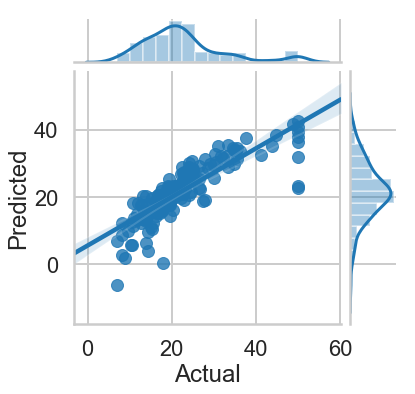

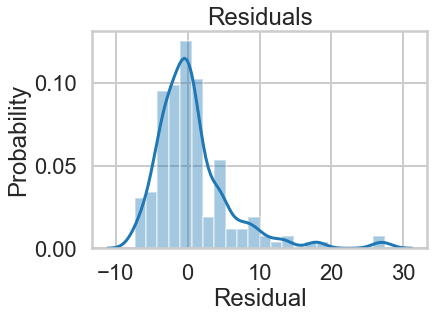

[{'r2_score': 0.7, 'mean_squared_error': 28.54, 'explained_variance_score': 0.7, 'mean_absolute_error': 3.46, 'median_absolute_error': 2.37, 'Test': 'baseline', 'Percent': 0}]


In [111]:
results = []
results.append(calcReg(df, 'baseline', 0))
print(results)

## Step 2:
Select between 1, 5 10, 20, 33, and 50% of your data on a single column (Completely at random), replace the present value with a NAN and then perform an imputation of that value.   

In each case perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.

In [12]:
# def addNAN(seriesInput, percent):
#     seriesInput[seriesInput.sample(frac=percent).index] = np.nan
# #     print('Percent NAN: ', (seriesInput.isnull().sum() / len(seriesInput)*100))
#     return

# df2=df.copy()
# addNAN(df2.AGE, 0.50)

In [13]:
def impute(seriesInput):
    from sklearn.preprocessing import Imputer

    imp = Imputer(missing_values=np.nan, 
                  strategy='mean', #median
                 copy=False)
    imp.fit(seriesInput)
    imp.transform(seriesInput)
    return

# impute(df2)

In [112]:
finalResults = []
# Missing Completely at Random 
NANtargets = [1,5,10,20,33,50]

MCARresults = []
for x in NANtargets:
    df2 = df.copy()
    df2.AGE[df2.AGE.sample(frac=(x/100)).index] = np.nan
    print((df2.isna().sum()/len(df2))*100)

    impute(df2)
    results.append(calcReg(df2,'MCAR',x, getPlots=False))
results

CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
RM         0.000000
AGE        0.988142
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
PRICE      0.000000
dtype: float64
CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
RM         0.000000
AGE        4.940711
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
PRICE      0.000000
dtype: float64
CRIM        0.000000
ZN          0.000000
INDUS       0.000000
CHAS        0.000000
NOX         0.000000
RM          0.000000
AGE        10.079051
DIS         0.000000
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           0.000000
LSTAT       0.000000
PRICE       0.000000
dtype: float64
CRIM        0.000000
ZN          0.000000
INDUS       0.000000
CHAS        0.000000
NOX         0.000

[{'r2_score': 0.7,
  'mean_squared_error': 28.54,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.46,
  'median_absolute_error': 2.37,
  'Test': 'baseline',
  'Percent': 0},
 {'r2_score': 0.7,
  'mean_squared_error': 28.51,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.46,
  'median_absolute_error': 2.35,
  'Test': 'MCAR',
  'Percent': 1},
 {'r2_score': 0.7,
  'mean_squared_error': 28.41,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.46,
  'median_absolute_error': 2.44,
  'Test': 'MCAR',
  'Percent': 5},
 {'r2_score': 0.7,
  'mean_squared_error': 28.29,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.46,
  'median_absolute_error': 2.36,
  'Test': 'MCAR',
  'Percent': 10},
 {'r2_score': 0.69,
  'mean_squared_error': 28.6,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.48,
  'median_absolute_error': 2.37,
  'Test': 'MCAR',
  'Percent': 20},
 {'r2_score': 0.69,
  'mean_squared_error': 28.76,
  'explained_variance_s

In [21]:
# # Missing Completely at Random 
# # all columns get missing values
# NANtargets = [1,5,10,20,33,50]

# results = []
# for x in NANtargets:
#     df2 = df.copy()
#     df2.loc[df2.sample(frac=(x/100)).index] = np.nan
#     print((df2.isna().sum()/len(df2))*100)

#     impute(df2)
#     results.append({'target missing':x, 'results':calcReg(df2)})
# results

## Step 3:
Take 2 different columns and create data “Missing at Random” when controlled for a third variable (i.e if Variable Z is > 30, than Variables X, Y are randomly missing).  Make runs with 10%, 20% and 30% missing data imputed via your best guess.  Repeat your fit and comparisons to the baseline.

In [113]:
NANtargets = [10,20,30]
NANcols = ['AGE','DIS']
mask = df2.RM > 6.5

# MARresults = []
for x in NANtargets:
    df2 = df.copy()
#     print((df2[mask].isna().sum()/len(df2[mask]))*100)
    df2.loc[df2.loc[mask].sample(frac=(x/100)).index, NANcols] = np.nan
    impute(df2)
    results.append(calcReg(df2,'MAR',(x), getPlots=False))
results

[{'r2_score': 0.7,
  'mean_squared_error': 28.54,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.46,
  'median_absolute_error': 2.37,
  'Test': 'baseline',
  'Percent': 0},
 {'r2_score': 0.7,
  'mean_squared_error': 28.51,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.46,
  'median_absolute_error': 2.35,
  'Test': 'MCAR',
  'Percent': 1},
 {'r2_score': 0.7,
  'mean_squared_error': 28.41,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.46,
  'median_absolute_error': 2.44,
  'Test': 'MCAR',
  'Percent': 5},
 {'r2_score': 0.7,
  'mean_squared_error': 28.29,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.46,
  'median_absolute_error': 2.36,
  'Test': 'MCAR',
  'Percent': 10},
 {'r2_score': 0.69,
  'mean_squared_error': 28.6,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.48,
  'median_absolute_error': 2.37,
  'Test': 'MCAR',
  'Percent': 20},
 {'r2_score': 0.69,
  'mean_squared_error': 28.76,
  'explained_variance_s

## Step 4:  
Create a Missing Not at Random pattern in which 25% of the data is missing for a single column.    Impute your data, fit the results and compare to a baseline.

In [114]:
NANtargets = [25]
NANcols = ['RM']
mask = df2['RM'] > 3.5

# MNARresults = []
for x in NANtargets:
    df2 = df.copy()
    df2.loc[df2.loc[mask].sample(frac=(x/100)).index, NANcols] = np.nan
    print((df2[mask].isna().sum()/len(df2[mask]))*100)
    impute(df2)
    results.append(calcReg(df2,'MNAR',x, getPlots=False))
# finalResults.append(MNARresults)
results

CRIM        0.000000
ZN          0.000000
INDUS       0.000000
CHAS        0.000000
NOX         0.000000
RM         24.901186
AGE         0.000000
DIS         0.000000
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           0.000000
LSTAT       0.000000
PRICE       0.000000
dtype: float64


[{'r2_score': 0.7,
  'mean_squared_error': 28.54,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.46,
  'median_absolute_error': 2.37,
  'Test': 'baseline',
  'Percent': 0},
 {'r2_score': 0.7,
  'mean_squared_error': 28.51,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.46,
  'median_absolute_error': 2.35,
  'Test': 'MCAR',
  'Percent': 1},
 {'r2_score': 0.7,
  'mean_squared_error': 28.41,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.46,
  'median_absolute_error': 2.44,
  'Test': 'MCAR',
  'Percent': 5},
 {'r2_score': 0.7,
  'mean_squared_error': 28.29,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.46,
  'median_absolute_error': 2.36,
  'Test': 'MCAR',
  'Percent': 10},
 {'r2_score': 0.69,
  'mean_squared_error': 28.6,
  'explained_variance_score': 0.7,
  'mean_absolute_error': 3.48,
  'median_absolute_error': 2.37,
  'Test': 'MCAR',
  'Percent': 20},
 {'r2_score': 0.69,
  'mean_squared_error': 28.76,
  'explained_variance_s

In [117]:
df = pd.DataFrame(results)
df

,Percent,Test,explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
0,0,baseline,0.70,3.46,28.54,2.37,0.70
1,1,MCAR,0.70,3.46,28.51,2.35,0.70
2,5,MCAR,0.70,3.46,28.41,2.44,0.70
3,10,MCAR,0.70,3.46,28.29,2.36,0.70
4,20,MCAR,0.70,3.48,28.60,2.37,0.69
5,33,MCAR,0.70,3.53,28.76,2.50,0.69
6,50,MCAR,0.70,3.45,28.21,2.35,0.70
7,10,MAR,0.70,3.46,28.90,2.22,0.69
8,20,MAR,0.69,3.51,29.73,2.26,0.68
9,30,MAR,0.70,3.48,28.52,2.35,0.70


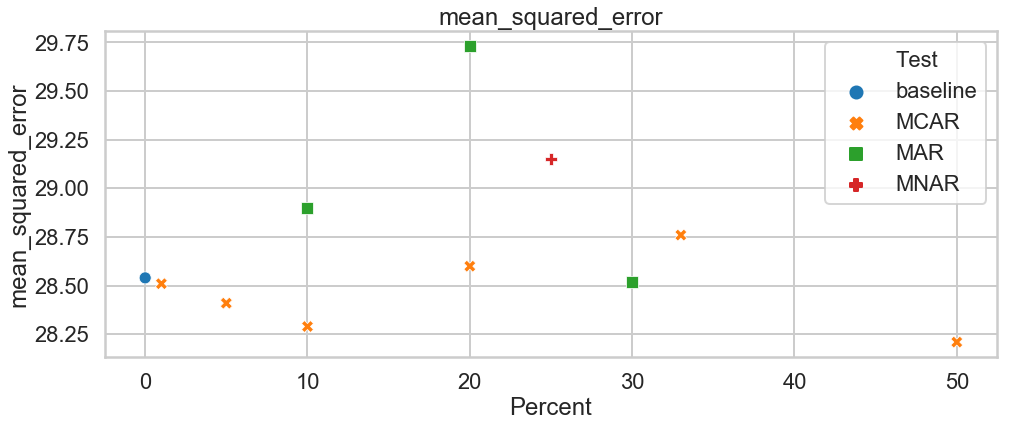

In [132]:
plt.figure(figsize=(16, 6))

ax = sns.scatterplot(x='Percent', 
                    y='mean_squared_error', 
                    data=df,
                    hue='Test',
                    style='Test')
ax.set_title('mean_squared_error')
plt.show()

In [ ]:
# Is there any relationship

##  Step 5 (Extra Credit) (10 points): 
Using the MCMC method, and your data from step 4, What is the difference in performance between imputation via ‘guess’ (mean/median, etc) and MCMC. 
